 # Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
means = study_data_complete.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = study_data_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = study_data_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sds = study_data_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = study_data_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":sds,
                              "Tumor Volume Std. Err.":sems})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_table = study_data_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

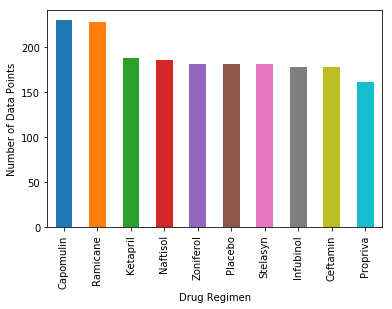

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = study_data_complete['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

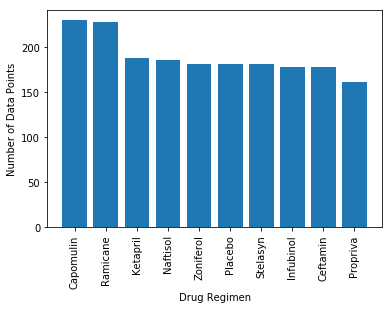

In [15]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
counts = study_data_complete['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

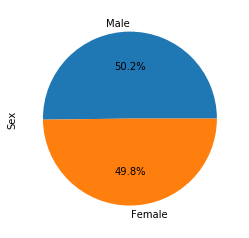

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = mouse_metadata.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
# plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.show()

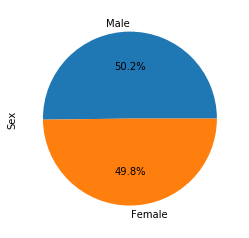

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = mouse_metadata.Sex.value_counts()
counts
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = study_data_complete.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor[['Mouse ID','Timepoint']].merge(study_data_complete,on=['Mouse ID','Timepoint'],how="left")

capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

# Quantitatively determine capomulin outliers
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [16]:
# Quantitatively determine ramicane outliers
ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < ram_lower_bound) | (ramicane > ram_upper_bound)]}")

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [10]:
# Quantitatively determine infubinol outliers
inf_quartiles = infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Infubinol potential outliers: {infubinol.loc[(infubinol < inf_lower_bound) | (infubinol > inf_upper_bound)]}")

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [11]:
# Quantitatively determine ceftamin outliers
cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin > cef_upper_bound)]}")

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


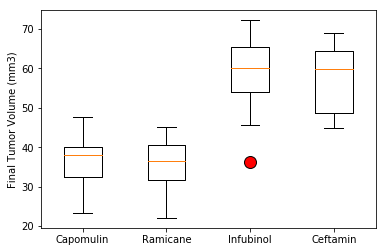

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

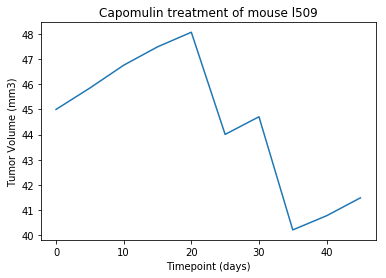

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = study_data_complete.loc[study_data_complete['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

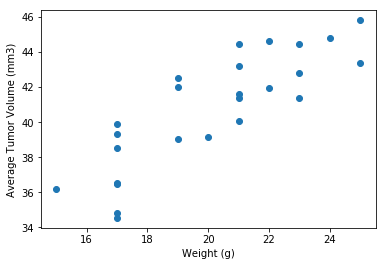

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_table = study_data_complete.loc[study_data_complete['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


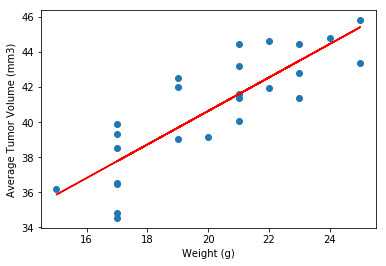

In [15]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()